In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)                    
# Combine the data into a single dataset
city_ride_data = pd.merge(city_data, ride_data, on="city", how='outer')

## Bubble Plot of Ride Sharing Data

In [2]:
# Display the merged DataFrame for preview
city_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
# Determine if there are any empty cells and how many records there are in total
city_ride_data.count()

city            2375
driver_count    2375
type            2375
date            2375
fare            2375
ride_id         2375
dtype: int64

In [4]:
# change the ride_id column to have the value of 1 to enable counting rides per city type
# and remove the date column is not needed for this analysis
city_ride_data["ride_id"] = 1
del city_ride_data["date"]
city_ride_data.head()

,city,driver_count,type,fare,ride_id
0,Richardfort,38,Urban,13.93,1
1,Richardfort,38,Urban,14.00,1
2,Richardfort,38,Urban,17.92,1
3,Richardfort,38,Urban,10.26,1
4,Richardfort,38,Urban,23.00,1


In [5]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [7]:
# change the ride_id column to have the value of 1 to enable counting rides per city type
ride_data["ride_id"] = 1
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,1
1,South Michelleport,2018-03-04 18:24:09,30.24,1
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,1
3,Rodneyfort,2018-02-10 23:22:03,23.44,1
4,South Jack,2018-03-06 04:28:35,34.58,1


In [8]:
# calculate the total fares and total rides per city and rename the columns
city_ride_sum = ride_data.groupby("city").agg(np.sum)
city_ride_sum = city_ride_sum.rename(columns={"fare": "Total Fares", "ride_id": "Total Rides"})
city_ride_sum.head()

,Total Fares,Total Rides
city,,
Amandaburgh,443.55,18
Barajasview,557.31,22
Barronchester,582.76,16
Bethanyland,593.21,18
Bradshawfurt,400.64,10


In [9]:
city_ride_data.head()

,city,driver_count,type,fare,ride_id
0,Richardfort,38,Urban,13.93,1
1,Richardfort,38,Urban,14.00,1
2,Richardfort,38,Urban,17.92,1
3,Richardfort,38,Urban,10.26,1
4,Richardfort,38,Urban,23.00,1


In [10]:
# calcualte the average fare per city (Y coordinate)
avg_fare_city = round(city_ride_data.groupby("city").agg(np.mean), 2)
del avg_fare_city["driver_count"]
del avg_fare_city["ride_id"]
avg_fare_city.head()

,fare
city,
Amandaburgh,24.64
Barajasview,25.33
Barronchester,36.42
Bethanyland,32.96
Bradshawfurt,40.06


In [11]:
# assign the above series to a variable and pass it to a DataFrame
avg_fare_df = pd.DataFrame(avg_fare_city)
avg_fare_df = avg_fare_df.rename(columns={"fare": "avg fare"})
avg_fare_df.reset_index()

,city,avg fare
0,Amandaburgh,24.64
1,Barajasview,25.33
2,Barronchester,36.42
3,Bethanyland,32.96
4,Bradshawfurt,40.06
5,Brandonfort,35.44
6,Carriemouth,28.31
7,Christopherfurt,24.50
8,Colemanland,30.89
9,Davidfurt,32.00


In [12]:
#join the avg fare data with the city data
pre_summary_df = city_data.join(avg_fare_df, on="city", how="outer")
pre_summary_df.head()

,city,driver_count,type,avg fare
0,Richardfort,38,Urban,22.37
1,Williamsstad,59,Urban,24.36
2,Port Angela,67,Urban,23.84
3,Rodneyfort,34,Urban,28.62
4,West Robert,39,Urban,25.12


In [13]:
# Create aggregate DataFrame with all variables needed for analysis
summary_df = pre_summary_df.join(city_ride_sum, on="city", how="outer")
summary_df.head()

,city,driver_count,type,avg fare,Total Fares,Total Rides
0,Richardfort,38,Urban,22.37,626.45,28
1,Williamsstad,59,Urban,24.36,560.33,23
2,Port Angela,67,Urban,23.84,452.90,19
3,Rodneyfort,34,Urban,28.62,658.19,23
4,West Robert,39,Urban,25.12,778.84,31


In [14]:
# Isolate Urban data rows
summary_urban_df = summary_df.loc[summary_df["type"] == "Urban"]
summary_urban_df.head()

,city,driver_count,type,avg fare,Total Fares,Total Rides
0,Richardfort,38,Urban,22.37,626.45,28
1,Williamsstad,59,Urban,24.36,560.33,23
2,Port Angela,67,Urban,23.84,452.90,19
3,Rodneyfort,34,Urban,28.62,658.19,23
4,West Robert,39,Urban,25.12,778.84,31


In [15]:
# Reset the index of the main DataFrame and isolate Surburban data rows.
summary_df.reset_index()
summary_suburban_df = summary_df.loc[summary_df["type"] == "Suburban"]
summary_suburban_df.head()

,city,driver_count,type,avg fare,Total Fares,Total Rides
66,Port Shane,7,Suburban,31.08,590.48,19
67,Lake Ann,3,Suburban,30.89,370.68,12
68,Lake Scott,23,Suburban,31.89,573.95,18
69,Colemanland,23,Suburban,30.89,679.68,22
70,New Raymond,17,Suburban,27.96,615.16,22


In [16]:
# Reset the index of the main DataFrame and isolate Rural data rows.
summary_df.reset_index()
summary_rural_df = summary_df.loc[summary_df["type"] == "Rural"]
summary_rural_df.head()

,city,driver_count,type,avg fare,Total Fares,Total Rides
102,South Jennifer,7,Rural,35.26,246.85,7
103,West Heather,4,Rural,33.89,305.01,9
104,Newtonview,1,Rural,36.75,146.98,4
105,North Holly,8,Rural,29.13,262.17,9
106,Michaelberg,6,Rural,35.00,419.97,12


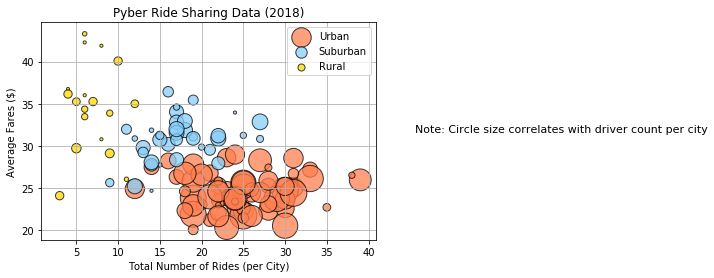

In [17]:
# Create the scatter plots

plt.scatter(summary_urban_df["Total Rides"], summary_urban_df["avg fare"], marker="o", 
facecolors="coral", edgecolors="black", s=summary_urban_df["driver_count"]*10, alpha=0.75)

plt.scatter(summary_suburban_df["Total Rides"], summary_suburban_df["avg fare"], marker="o", 
facecolors="lightskyblue", edgecolors="black", s=summary_suburban_df["driver_count"]*10, alpha=0.75)

plt.scatter(summary_rural_df["Total Rides"], summary_rural_df["avg fare"], marker="o", 
facecolors="gold", edgecolors="black", s=summary_rural_df["driver_count"]*10, alpha=0.75)
# customize plot
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fares ($)")
plt.legend(city_ride_data["type"].unique(), loc='best')
sidetitle= "Note: Circle size correlates with driver count per city"
plt.figtext(0.99, 0.5, sidetitle, wrap=True, horizontalalignment='left', fontsize=11)
plt.grid()
plt.show()

In [18]:
plt.savefig("../Images/Pyber-bubble-plot.png")

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

In [19]:

# Calculate the aggregate total fare for the urban communities
total_urban_fare = summary_urban_df["Total Fares"].sum()

In [20]:
# Calculate the aggregate total fare for the Suburban communities
total_suburban_fare = round(summary_suburban_df["Total Fares"].sum(), 2)

In [21]:
# Calculate the aggregate total fare for the Rural communities
total_rural_fare = round(summary_rural_df["Total Fares"].sum(), 2)

In [22]:
# labels for the sections of the pie chart
labels = ["Urban", "Suburban", "Rural"]

# values of each section of the pie chart
sizes = [total_urban_fare, total_suburban_fare, total_rural_fare]

# colors of each section of the pie chart
colors = ["coral", "lightskyblue", "gold"]

# seperate the Urban section from the others
explode = (0.1, 0., 0.0)

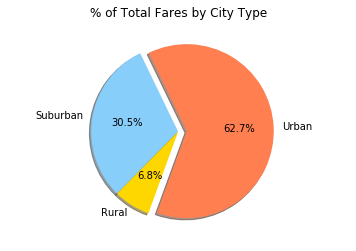

In [23]:
# Use the variables above to generate the pie chart
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=250)
plt.show()

In [24]:
# save the pie chart in the Images file
plt.savefig("../Images/Pyber-total_fares_pie.png")

<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

In [25]:
# calculate total number of rides in Urban communities
total_urban_rides = summary_urban_df["Total Rides"].sum()

In [26]:
# calculate total number of rides in Suburban communities
total_suburban_rides = summary_suburban_df["Total Rides"].sum()

In [27]:
# calculate total number of rides in Rural communities
total_rural_rides = summary_rural_df["Total Rides"].sum()

In [28]:
# labels for the sections of the pie chart
labels = ["Urban", "Suburban", "Rural"]

# values of each section of the pie chart
sizes = [total_urban_rides, total_suburban_rides, total_rural_rides]

# colors of each section of the pie chart
colors = ["coral", "lightskyblue", "gold"]

# seperate the Urban section from the others
explode = (0.1, 0., 0.0)

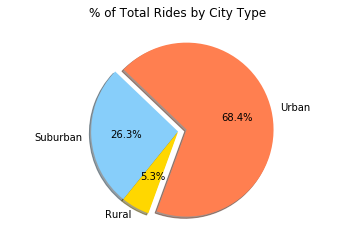

In [29]:
# Use the variables above to generate the pie chart
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=250)
plt.show()

In [30]:
# save the pie chart in the Images file
plt.savefig("../Images/Pyber-total_rides_pie.png")

<Figure size 432x288 with 0 Axes>

## Total Drivers by City Type

In [31]:
# calculate total number of rides in Urban communities
total_urban_drivers = summary_urban_df["driver_count"].sum()

In [32]:
# calculate total number of rides in Suburban communities
total_suburban_drivers = summary_suburban_df["driver_count"].sum()

In [33]:
# calculate total number of rides in Rural communities
total_rural_drivers = summary_rural_df["driver_count"].sum()

In [34]:
# labels for the sections of the pie chart
labels = ["Urban", "Suburban", "Rural"]

# values of each section of the pie chart
sizes = [total_urban_drivers, total_suburban_drivers, total_rural_drivers]

# colors of each section of the pie chart
colors = ["coral", "lightskyblue", "gold"]

# seperate the Urban section from the others
explode = (0.1, 0., 0.0)

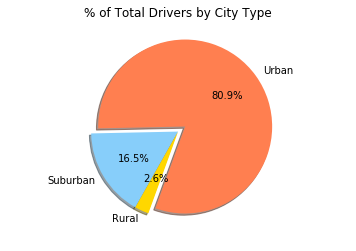

In [35]:
# Use the variables above to generate the pie chart
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=250)
plt.show()

In [36]:
# save the pie chart in the Images file
plt.savefig("../Images/Pyber-total_drivers_pie.png")

<Figure size 432x288 with 0 Axes>

## Three Observable Trends Based on the Data

I. Average fares are significantly higher in the rural and suburban areas than in the city areas.

II. While it is true that average fares are higher in rural and suburban areas, the total volume of rides in the urgan areas is more than double that in the rural areas and substantially higher than in the suburban areas.

III. There are far more drivers located in the urban areas than in the rural or suburban areas.
